
Running ml_period
Accuracy:0.657803468208
                           price  w orders
date                                      
2018-08-10 02:00:00  6459.867408  1    NaN
2018-08-10 02:05:00  6469.569724  1   WAIT

Running ml_xgb
Accuracy:0.539884393064
                           price  w orders
date                                      
2018-08-10 02:00:00  6459.867408  1    NaN
2018-08-10 02:05:00  6469.569724  1   WAIT

Running ml_randfor
Accuracy:0.538728323699
                           price  w orders
date                                      
2018-08-10 02:00:00  6459.867408  1    NaN
2018-08-10 02:05:00  6469.569724  1   WAIT

	USDT_BTC

Retorno del mercacdo: -0.795455677235
Retorno ml_period 30.313389684
Retorno ml_xgb 2.53306867288
Retorno ml_randfor 4.6133670884


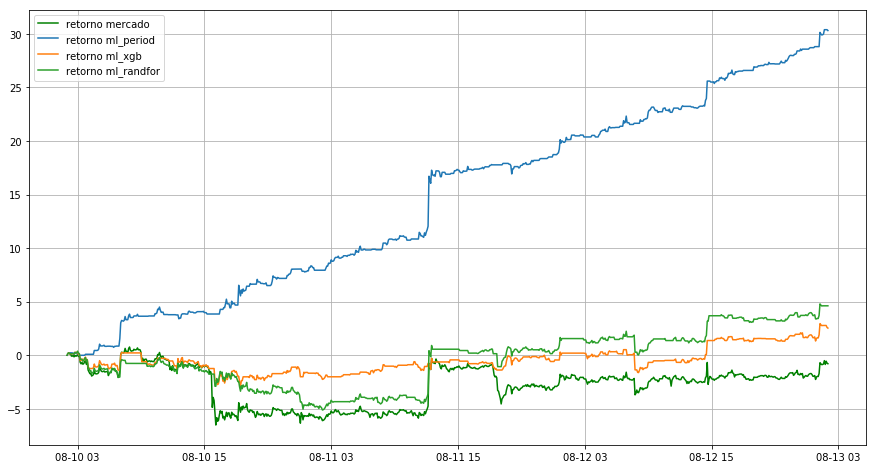

In [13]:
import pandas as pd
import pylab as plt
from tusp import string2ts, ts2string
from bot import prepareData,marketReturn,ml_init_time,run_strategy, makeVolatility
import numpy as np
import json
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 8

pair="USDT_BTC"


start=string2ts("2018-08-10 02:00:00")
end=string2ts("2018-08-13 02:00:00")
period=3600/12

# trayendo y preparando datos
df  = prepareData(pair=pair,
                  start=start,
                  end=end,
                  period=period)

per = 0.95
cum_return1 = marketReturn(df["close"]) 

marketRet = marketReturn(df["close"])[-1]*100 

# calculando volatilidad en función del tamaño de las velas
df["volatility"] = makeVolatility(df,c=1.7)

from profit import profit,profit2

start2 = ml_init_time(end,start,per)

df12 = prepareData(pair=pair, start=start2, end=end, period=period)

# "ml_stacking",
# "ml_randfor", "ml_xgb",
strategies = [ "ml_period", "ml_xgb", "ml_randfor"]

list_profit = []
list_v = []
ws = []


for strategy in strategies:
    
    print "\nRunning",strategy
    w, t = run_strategy(strategy, df12, pair, True, per)
    relativeReturn,v = profit(w)
    
    ws.append(w)
    list_profit.append(relativeReturn)
    list_v.append(v)

    
print "\n\t%s\n"%pair
print 'Retorno del mercacdo: %s'%(marketRet)
for i, strategy in enumerate(strategies):
    print "Retorno", strategy, list_profit[i]*100

plt.plot(df.index[:],cum_return1*100,'g', label='retorno mercado')
for i, strategy in enumerate(strategies):
    
    plt.plot(df12.index[int(len(df12)*per):],list_v[i]*100,label='retorno '+strategy)

plt.legend(loc='best')
plt.grid()

In [14]:
len(df12)

17281

In [15]:
ws[0][["w", "orders"]].tail()

,w,orders
date,,
2018-08-13 01:40:00,1.0,SELL
2018-08-13 01:45:00,0.0,WAIT
2018-08-13 01:50:00,0.0,WAIT
2018-08-13 01:55:00,0.0,BUY
2018-08-13 02:00:00,1.0,SELL
